In [1]:
# You must run this cell, but you can ignore its contents.

import hashlib

def ads_hash(ty):
    """Return a unique string for input"""
    ty_str = str(ty).encode()
    m = hashlib.sha256()
    m.update(ty_str)
    return m.hexdigest()[:10]

# Flow control - if statements

## Q1

Write a function called `is_over10` which accepts a single input argument and which returns the boolean `True` if the input is greater than 10. Otherwise the function should return `False`.

In [2]:
def is_over10(x):
    if x > 10:
        return True
    else:
        return False

In [3]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(is_over10(9)) == '60a33e6cf5'
assert ads_hash(is_over10(9.9999)) == '60a33e6cf5'
assert ads_hash(is_over10(11)) == '3cbc87c768'
assert ads_hash(is_over10(10.000001)) == '3cbc87c768'

## Q2

Write a function called `is_over_a` which accepts two input arguments `x` (the first argument) and `a` (the second argument). The function should return the boolean `True` if `x` is greater to or equal than `a`. Otherwise the function should return `False`.

In [4]:
def is_over_a(x,a):
    if x >= a:
        return True
    else:
        return False

In [5]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(is_over_a(9,10)) == '60a33e6cf5'
assert ads_hash(is_over_a(9.9999,10)) == '60a33e6cf5'
assert ads_hash(is_over_a(10,10)) == '3cbc87c768'
assert ads_hash(is_over_a(11,10)) == '3cbc87c768'
assert ads_hash(is_over_a(10.000001,10)) == '3cbc87c768'
assert ads_hash(is_over_a(-9,-10)) == '3cbc87c768'
assert ads_hash(is_over_a(-9,10)) == '60a33e6cf5'

# Flow control - `while` loops using $R_t$, the *effective reproduction number*

To make our examples more interesting, we are going to use some concepts from epidemiology. We will perform some simple epidemiological modeling of disease spread. First, let's define $R_t$, the [*effective reproduction number*](https://en.wikipedia.org/wiki/Basic_reproduction_number#Effective_reproduction_number). This is the the average number of new infections caused by a single infected individual at time $t$ in a partially susceptible population.

Let's do some simulations to understand the effect different $R_t$ values would have.

Consider this python code:

```python
Rt = 1.5

infected = 1
num_generations = 0
while infected < 1000:
    infected = infected*Rt
    num_generations += 1
    
print(f"It took {num_generations} generations to reach 1000 infected")
```

If we wanted to write this using mathematical notation, we would write this as

$N_{t+1} = R_t N_t$

where $N_t$ is the number of infected individuals at generation $t$ and $N_{t+1}$ is the number of infected individuals at the next generation ($t+1$).

**What is a "generation"?** What we call "generation" here is called the serial interval (SI) in the scientific literature. According to [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6092233/), "the serial interval (SI), defined as the time between disease symptom onset of a case and that of its infector, is a surrogate for the generation interval— an unobservable quantity defined as the time between the infection of a case and the time of infection of its infector." 

With regard to SARS-CoV-2 in Germany, according to [the Corona-Warn-App FAQ (Section "App Features" / "Other features" / "In-App statistics")](https://web.archive.org/web/20221105141411/https://www.coronawarn.app/en/faq/results/?search=&topic=application#other_features), "The concept of the R-value and the data basis of its calculation is described in detail in the Epidemiological Bulletin of the RKI ([#17/2020 of 04/23/2020](https://www.rki.de/DE/Content/Infekt/EpidBull/Archiv/2020/17/Art_02.html)). Sample calculations and the daily updated R-values (4-day and 7-day R-value) are available as an Excel table at http://www.rki.de/covid-19-nowcasting." The data from 2 March 2020 to 17 June 2023 are available at [github.com/robert-koch-institut/SARS-CoV-2-Nowcasting_und_-R-Schaetzung](https://github.com/robert-koch-institut/SARS-CoV-2-Nowcasting_und_-R-Schaetzung/blob/main/Nowcast_R_aktuell.csv).

Here is a [guide to R](https://www.nature.com/articles/d41586-020-02009-w) from July 2020.

## Q1

Modify the code above so that you create a variable called `generations_to_1000` which has the number of generations required for 1 person to reach 1000 people infected.

In [6]:
Rt = 1.5

infected = 1
num_generations = 0
while infected < 1000:
    infected = infected*Rt
    num_generations += 1

print(f"It took {num_generations} generations to reach 1000 infected")
generations_to_1000 = num_generations

It took 18 generations to reach 1000 infected


In [7]:
# If this runs without error, it means the answer in your previous cell was correct.
assert ads_hash(generations_to_1000)=='4ec9599fc2'

## Q2

Now create a function called `find_cycles_to_reach_1000` which takes 1 argument, `Rt`. This function should return the number of cycles required to reach 1000 infected people.

Your function signature should look like this:

```python
    def find_generations_to_reach_1000(Rt):
```

In [8]:
def find_generations_to_reach_1000(Rt):
    infected = 1
    num_generations = 0
    while infected < 1000:
        infected = infected*Rt
        num_generations += 1

    return num_generations    

In [9]:
# If this runs without error, it means the answer in your previous cell was correct.

assert ads_hash(find_generations_to_reach_1000(1.1))=='96061e92f5'
assert ads_hash(find_generations_to_reach_1000(1.5))=='4ec9599fc2'
assert ads_hash(find_generations_to_reach_1000(2.0))=='4a44dc1536'

## Q3

Now create a function called `simulate_generation` which takes two arguments, `a` and `Rt`. This function should return `None`. The first argument `a` will be a list with the number of infected individuals and `Rt` is the effective reproduction number, as before. The function should compute the number of newly infected individuals after one generation and append this to the list passed as the first argument.

Your function signature should look like this:

```python
    def simulate_generation(a,Rt):
```

Here is an example that works:

```python
b = [1]
simulate_generation(b,3)
simulate_generation(b,3)
simulate_generation(b,3)
b
```

In this above example, `b` would be equal to `[1, 3, 9, 27]` at the end.


In [10]:
def simulate_generation(a,Rt):
    previous = a[-1]
    new_infected = previous*Rt
    a.append(new_infected)

In [11]:
# If this runs without error, it means the answer in your previous cell was correct.

aa = [1]
assert ads_hash(simulate_generation(aa, 22)) == 'dc937b5989'
assert ads_hash(aa)=='c7e4ccf872'

## Q4

Now create a function called `calculate_timeseries_to_1000` which takes one argument, `Rt`. This function should return a list containing the number of infected individuals after each cycle up to and including the first value over 1000 individuals.

Your function signature should look like this:

```python
    def calculate_timeseries_to_1000(Rt):
```

Your code should work so that `calculate_timeseries_to_1000(2)` would return `[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]` and that `calculate_timeseries_to_1000(3)` would return `[1, 3, 9, 27, 81, 243, 729, 2187]`.

In [12]:
def calculate_timeseries_to_1000(Rt):
    a = [1]
    while a[-1] < 1000:
        simulate_generation(a,Rt)
    return a

In [13]:
assert ads_hash(calculate_timeseries_to_1000(2))=='a9ad958975'
assert ads_hash(calculate_timeseries_to_1000(3))=='7aa0d3bbca'

## Bonus - plotting the results

Let's now see the result of these simulations.

In [14]:
# Below, we will use matplotlib, so we need to import it here.
import matplotlib.pyplot as plt

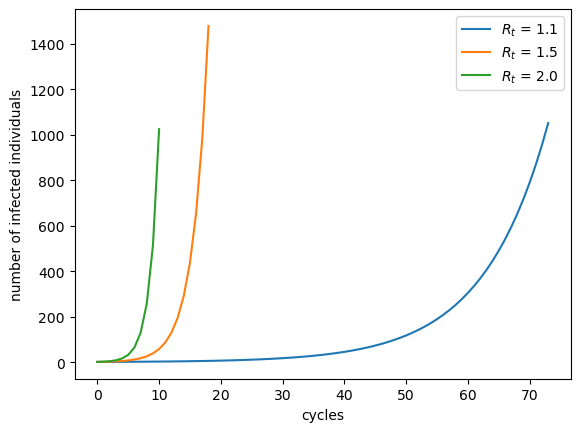

In [15]:
plt.plot(calculate_timeseries_to_1000(1.1), label="$R_t$ = 1.1")
plt.plot(calculate_timeseries_to_1000(1.5), label="$R_t$ = 1.5")
plt.plot(calculate_timeseries_to_1000(2.0), label="$R_t$ = 2.0")
plt.xlabel("cycles")
plt.ylabel("number of infected individuals")
plt.legend();

# String formatting

Remember from lecture various ways of formatting strings with template in Python. We are going to use f-strings here. 

Here is an example:

```python
city="Freiburg"
continent="Europe"
result = f"The city {city} is in the continent {continent}"
```

This will set `result` to `'The city Freiburg is in the continent Europe'`.

## Q1

Create a function named `greeting` which takes two arguments, `name` and `age`. It should return a string with these values inserted in to a string so that when called like

```python
result = greeting("Andrew",7)
```

`result` will be `'Hello. My name is Andrew. My age is 7'`.

The function signature will be

```python
def greeting(name, age):
```

In [16]:
def greeting(name, age):
    return f"Hello. My name is {name}. My age is {age}"

In [17]:
# If this runs without error, it means the answer in your previous cell was correct.

assert ads_hash(greeting("Andrew",7))=='1370611a0d'
assert ads_hash(greeting("Bob",47))=='3b8fd03444'